In [99]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
df = pd.read_csv('/content/drive/MyDrive/Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
5,6,Female,22,58000,76,Artist,0,2
6,7,Female,35,31000,6,Healthcare,1,3
7,8,Female,23,84000,94,Healthcare,1,3
8,9,Male,64,97000,3,Engineer,0,3
9,10,Female,30,98000,72,Artist,1,4


In [101]:
#Drop rows with NaN values
df = df.dropna()

In [102]:
print(df.size)                
print(df.shape)                
print(df.keys())   

15720
(1965, 8)
Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')


In [103]:
df.head(10)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
5,6,Female,22,58000,76,Artist,0,2
6,7,Female,35,31000,6,Healthcare,1,3
7,8,Female,23,84000,94,Healthcare,1,3
8,9,Male,64,97000,3,Engineer,0,3
9,10,Female,30,98000,72,Artist,1,4


                             Age  Annual Income ($)  Spending Score (1-100)  \
Age                     1.000000           0.021064               -0.037387   
Annual Income ($)       0.021064           1.000000                0.026716   
Spending Score (1-100) -0.037387           0.026716                1.000000   
Work Experience        -0.016771           0.087135               -0.025587   
Family Size             0.034810           0.093757                0.005859   

                        Work Experience  Family Size  
Age                           -0.016771     0.034810  
Annual Income ($)              0.087135     0.093757  
Spending Score (1-100)        -0.025587     0.005859  
Work Experience                1.000000     0.012727  
Family Size                    0.012727     1.000000  


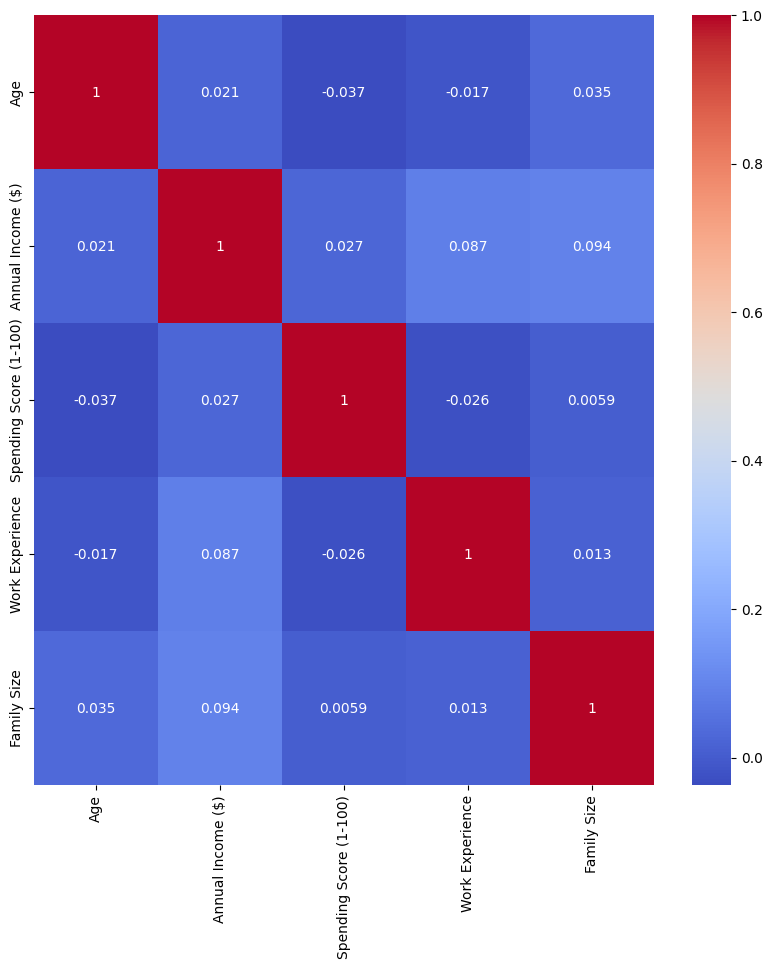

In [ ]:
#I use correlation matrix to see the relationships between the columns.
#It. shows that family size and work experience is positively related with Annual Income.


import matplotlib.pyplot as plt
import seaborn as sns


corr_matrix = df[['Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Work Experience',
       'Family Size']].corr()
print(corr_matrix)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

plt.show()

In [104]:
#Encode the categorical columns.
#Gender and profession has string values but they should be numeric.
columns_to_encode = ['Gender', 'Profession' ]
encoders = {}
for column in columns_to_encode:
    encoder = LabelEncoder()
    df[column+'_encoded'] = encoder.fit_transform(df[column])
    encoders[column] = encoder
df.drop(columns_to_encode, axis=1, inplace=True)

In [105]:
df.head(11)

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_encoded,Profession_encoded
0,1,19,15000,39,1,4,1,5
1,2,21,35000,81,3,3,1,2
2,3,20,86000,6,1,1,0,2
3,4,23,59000,77,0,2,0,7
4,5,31,38000,40,2,6,0,3
5,6,22,58000,76,0,2,0,0
6,7,35,31000,6,1,3,0,5
7,8,23,84000,94,1,3,0,5
8,9,64,97000,3,0,3,1,2
9,10,30,98000,72,1,4,0,0


In [ ]:
print(df.keys())   

Index(['CustomerID', 'Age', 'Annual Income ($)', 'Spending Score (1-100)',
       'Work Experience', 'Family Size', 'Gender_encoded',
       'Profession_encoded'],
      dtype='object')


In [106]:
#Map the encoded values back to their original labels
print("Unique genders and their encoded values:")
for code in df['Gender_encoded'].unique():
    gender = encoders['Gender'].inverse_transform([code])[0]
    print(f"{gender}: {code}")

Unique genders and their encoded values:
Male: 1
Female: 0


In [107]:
#Map the encoded values back to their original labels
print("Unique professions and their encoded values:")
for code in df['Profession_encoded'].unique():
    profession = encoders['Profession'].inverse_transform([code])[0]
    print(f"{profession}: {code}")

Unique professions and their encoded values:
Healthcare: 5
Engineer: 2
Lawyer: 7
Entertainment: 3
Artist: 0
Executive: 4
Doctor: 1
Homemaker: 6
Marketing: 8


In [ ]:
print(df.keys())  
df.head(10)

Index(['CustomerID', 'Age', 'Annual Income ($)', 'Spending Score (1-100)',
       'Work Experience', 'Family Size', 'Gender_encoded',
       'Profession_encoded'],
      dtype='object')


,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_encoded,Profession_encoded
0,1,19,15000,39,1,4,1,5
1,2,21,35000,81,3,3,1,2
2,3,20,86000,6,1,1,0,2
3,4,23,59000,77,0,2,0,7
4,5,31,38000,40,2,6,0,3
5,6,22,58000,76,0,2,0,0
6,7,35,31000,6,1,3,0,5
7,8,23,84000,94,1,3,0,5
8,9,64,97000,3,0,3,1,2
9,10,30,98000,72,1,4,0,0


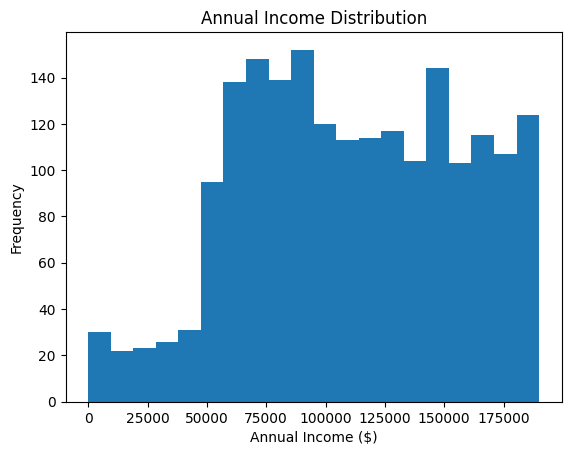

In [108]:
#I plotted histogram to decide the income bins.
#print(hist(df['Annual Income ($)'], bins=20))
plt.hist(df['Annual Income ($)'], bins=20)


plt.xlabel('Annual Income ($)')
plt.ylabel('Frequency')
plt.title('Annual Income Distribution')

#I used qcut to bin variable into 5 equal frequency bins
df['income_bins'] = pd.qcut(df['Annual Income ($)'], q=5, duplicates='drop')
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
df['income_bin_labels'] = pd.qcut(df['Annual Income ($)'], q=5, duplicates='drop', labels=labels)


In [109]:

#Bin edges for age column
bins_age = [0, 25, 30, 35, 40, 50, max(df['Age'])]
labels_age = ['<25', '25-30', '31-35', '36-40', '41-50', '>50']

#Created a new column called age group
df['Age Group'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age)


In [ ]:
df.head(10)

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_encoded,Profession_encoded,income_bins,income_bin_labels,Age Group
0,1,19,15000,39,1,4,1,5,"(-0.001, 67983.2]",Very Low,<25
1,2,21,35000,81,3,3,1,2,"(-0.001, 67983.2]",Very Low,<25
2,3,20,86000,6,1,1,0,2,"(67983.2, 93848.8]",Low,<25
3,4,23,59000,77,0,2,0,7,"(-0.001, 67983.2]",Very Low,<25
4,5,31,38000,40,2,6,0,3,"(-0.001, 67983.2]",Very Low,31-35
5,6,22,58000,76,0,2,0,0,"(-0.001, 67983.2]",Very Low,<25
6,7,35,31000,6,1,3,0,5,"(-0.001, 67983.2]",Very Low,31-35
7,8,23,84000,94,1,3,0,5,"(67983.2, 93848.8]",Low,<25
8,9,64,97000,3,0,3,1,2,"(93848.8, 125666.8]",Moderate,>50
9,10,30,98000,72,1,4,0,0,"(93848.8, 125666.8]",Moderate,25-30


In [110]:
#Splitting the data into train and test sets

X = df[['Age', 'Spending Score (1-100)','Work Experience', 'Family Size', 'Gender_encoded','Profession_encoded']]

y = df['income_bin_labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [111]:
#My train set has similar number of samples for each category
train_labels = pd.Series(y_train)
train_labels.value_counts()

Very Low     322
Very High    315
Moderate     314
High         311
Low          310
Name: income_bin_labels, dtype: int64

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

null_rows = y_train.isnull()
X_train = X_train[~null_rows]
y_train = y_train[~null_rows]


model = LogisticRegression(max_iter=300)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       0.22      0.21      0.21        82
         Low       0.28      0.17      0.21        83
    Moderate       0.20      0.20      0.20        79
   Very High       0.14      0.09      0.11        78
    Very Low       0.22      0.41      0.29        71

    accuracy                           0.21       393
   macro avg       0.21      0.22      0.20       393
weighted avg       0.21      0.21      0.20       393



In [113]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[17  6 23 11 25]
 [16 14 10 12 31]
 [12 11 16 14 26]
 [19 10 21  7 21]
 [14  9 12  7 29]]


In [114]:
import joblib

# Save the encoders
joblib.dump(encoders['Gender'], 'gender_encoder.pkl')
joblib.dump(encoders['Profession'], 'profession_encoder.pkl')


joblib.dump(model, 'LR_dataglacier_model.pkl')
loaded_model = joblib.load('LR_dataglacier_model.pkl')


In [115]:
#Example new data
new_data = pd.DataFrame({'Age': [28], 'Spending Score (1-100)': [67],'Work Experience': [3], 'Family Size':[1], 'Gender': ['Male'],'Profession':['Engineer']})

for column in columns_to_encode:
    encoder = encoders[column]
    new_data[column+'_encoded'] = encoder.transform(new_data[column])

#Drop original columns
new_data.drop(columns_to_encode, axis=1, inplace=True)

#Make predictions
predictions = model.predict(new_data)


print(predictions)

['Very Low']
